In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
def y(lambda_var: np.floating, x: np.floating) -> np.floating:
    return np.exp(lambda_var * x)

# Explicit Euler Method

$$
y_{k+1} = (1 + z) y_k
$$


In [11]:
def explicit_euler_method(lambda_var: np.floating, n: int) -> np.floating:
    y_k = np.float64(1)
    z = np.float64(lambda_var / n)
    for _ in range(n):
        y_k = (1 + z) * y_k
    return y_k

# Implicit Euler Method

$$
y_{k+1} = \frac{y_k}{1-z}
$$


In [12]:
def implicit_euler_method(lambda_var: np.floating, n: int) -> np.floating:
    y_k = np.float64(1)
    z = np.float64(lambda_var / n)
    for _ in range(n):
        y_k = y_k / (1 - z)
    return y_k

# Trapezoidal Rule

$$
y_{k+1} = \frac{1+z/2}{1-z/2}y_k
$$


In [13]:
def trapezoidal_rule(lambda_var: np.floating, n: int) -> np.floating:
    y_k = np.float64(1)
    z = np.float64(lambda_var / n)
    for _ in range(n):
        y_k = (1 + z / 2) / (1 - z / 2) * y_k
    return y_k

Implementing the method and show the results

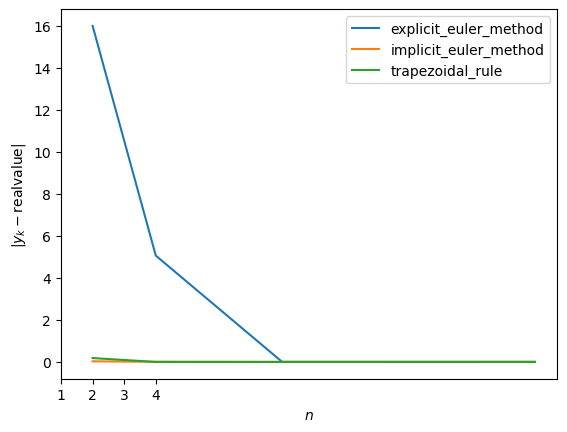

In [14]:
lambda_var = np.float64(-10)
n = [2, 4, 8, 16]
real_value = y(lambda_var, np.float64(1))

for method in [explicit_euler_method, implicit_euler_method, trapezoidal_rule]:
    errors = [np.abs(method(lambda_var, n_i) - real_value) for n_i in n]
    plt.plot(n, errors, label=method.__name__)

plt.xticks(range(1, 5))
plt.xlabel(r"$n$")
plt.ylabel(r"$|y_k-\text{realvalue}|$")
plt.legend()

plt.savefig("1_error_plot.png")

Implementing the method and show the relationship between $\log_2(\text{meshes})$ and $\ln(|y_k-\text{realvalue}|)$

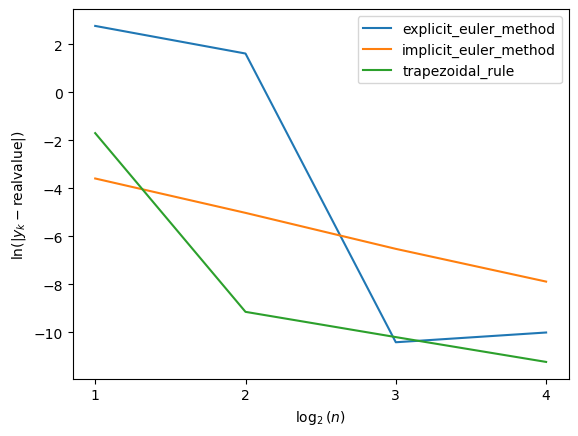

In [15]:
lambda_var = np.float64(-10)
n = [2, 4, 8, 16]
real_value = y(lambda_var, np.float64(1))

for method in [explicit_euler_method, implicit_euler_method, trapezoidal_rule]:
    errors = [np.abs(method(lambda_var, n_i) - real_value) for n_i in n]
    plt.plot(range(1, 5), np.log(errors), label=method.__name__)

plt.xticks(range(1, 5))
plt.xlabel(r"$\log_2(n)$")
plt.ylabel(r"$\ln(|y_k-\text{realvalue}|)$")
plt.legend()

plt.savefig("1_log_error_plot.png")